In [247]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from scipy.stats.mstats import winsorize
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_info_columns', 500)
pd.set_option('display.max_info_rows', 2000)
pd.set_option('display.expand_frame_repr', True)
pd.set_option('display.width', 2000)
sns.set_style("whitegrid")
#baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
#eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 11 }
pd.options.display.float_format = '{:.2f}'.format

In [248]:
df = pd.read_csv("filled_scout_20201204.csv")

In [249]:
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 100

In [250]:
def show_nans(df, limit):
    missing = df.isnull().sum()*100/df.shape[0]
    return missing.loc[lambda x : x >= limit]

def perc_nans(serial):
    # display percentage of nans in a Series
    return serial.isnull().sum()/serial.shape[0]*100

In [251]:
def fill_most(df, group_col, col_name):
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        grp_inx = list(df[cond][col_name].index)
        mode = list(df[cond][col_name].mode())
        if mode != []:
            df[col_name].iloc[grp_inx] = df[col_name].iloc[grp_inx].fillna(df[cond][col_name].mode()[0])
        else:
            df[col_name].iloc[grp_inx] = df[col_name].iloc[grp_inx].fillna(df[col_name].mode()[0])
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [252]:
def fill_prop(df, group_col, col_name):
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        grp_inx = list(df[cond][col_name].index)
        df.loc[cond, col_name] = df.loc[cond, col_name].fillna(method="ffill").fillna(method="bfill")
    df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [253]:
def fill(df, group_col1, group_col2, col_name, method): # method can be "mode" or "median" or "ffill"
    if method == "mode":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                grp_inx = list(df[cond2][col_name].index)
                mode1 = list(df[cond1][col_name].mode())
                mode2 = list(df[cond2][col_name].mode())
                if (mode1 != []) and (mode2 != []):
                    df[col_name].iloc[grp_inx] = df[col_name].iloc[grp_inx].fillna(df[cond2][col_name].mode()[0]).fillna(df[cond1][col_name].mode()[0])
                elif mode1 != []:
                    df[col_name].iloc[grp_inx] = df[col_name].iloc[grp_inx].fillna(df[cond1][col_name].mode()[0])
                else:
                    df[col_name].iloc[grp_inx] = df[col_name].iloc[grp_inx].fillna(df[col_name].mode()[0])
                
    elif method == "median":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                grp_inx = list(df[cond2][col_name].index)
                df[col_name].iloc[grp_inx] = df[col_name].iloc[grp_inx].fillna(df[cond2][col_name].median()).fillna(df[cond1][col_name].median()).fillna(df[col_name].median())
                
    elif method == "ffill":           
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                grp_inx = list(df[cond2][col_name].index)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(method="ffill").fillna(method="bfill")
                
        for group1 in list(df[group_col1].unique()):
            cond1 = df[group_col1]==group1
            df.loc[cond1, col_name] = df.loc[cond1, col_name].fillna(method="ffill").fillna(method="bfill")            
           
        df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [254]:
df.shape

(15919, 123)

In [255]:
df.head(1)

,url,make_model,body_type,price,vat,km,hp,Type,Previous_Owners,Inspection_New,Make,Model,Body_Color,Paint_Type,Nr_of_Doors,Nr_of_Seats,Gearing_Type,Displacement,Cylinders,Weight,Drive_Chain,Fuel,CO2_Emission,Emission_Class,Gears,Age,Upholstery_Type,Upholstery_Color,Combumption_Comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,...,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights
0,https://www.autoscout24.com//offers/audi-a1-sportback-1-4-tdi-s-tronic-xenon-navi-klima-diesel-black-bdab349a-caa5-41b0-98eb-c1345b84445e,Audi A1,Sedans,15770,VAT deductible,56013.00,66.00,Used,2.00,1,Audi,"['\n', 'A1', '\n']",Black,Metallic,5.00,5.00,Automatic,1422.00,3.00,1220.00,front,Diesel,99.00,Euro 6,5.00,3.00,Cloth,Black,3.80,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,...,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1


In [256]:
list(df.columns)

['url',
 'make_model',
 'body_type',
 'price',
 'vat',
 'km',
 'hp',
 'Type',
 'Previous_Owners',
 'Inspection_New',
 'Make',
 'Model',
 'Body_Color',
 'Paint_Type',
 'Nr_of_Doors',
 'Nr_of_Seats',
 'Gearing_Type',
 'Displacement',
 'Cylinders',
 'Weight',
 'Drive_Chain',
 'Fuel',
 'CO2_Emission',
 'Emission_Class',
 'Gears',
 'Age',
 'Upholstery_Type',
 'Upholstery_Color',
 'Combumption_Comb',
 'cc_Air conditioning',
 'cc_Air suspension',
 'cc_Armrest',
 'cc_Automatic climate control',
 'cc_Auxiliary heating',
 'cc_Cruise control',
 'cc_Electric Starter',
 'cc_Electric tailgate',
 'cc_Electrical side mirrors',
 'cc_Electrically adjustable seats',
 'cc_Electrically heated windshield',
 'cc_Heads-up display',
 'cc_Heated steering wheel',
 'cc_Hill Holder',
 'cc_Keyless central door lock',
 'cc_Leather seats',
 'cc_Leather steering wheel',
 'cc_Light sensor',
 'cc_Lumbar support',
 'cc_Massage seats',
 'cc_Multi-function steering wheel',
 'cc_Navigation system',
 'cc_Panorama roof',
 'cc

## Cylinders

In [257]:
df.Cylinders.value_counts(dropna=False)

4.00    12926
3.00     2963
5.00       22
6.00        3
8.00        2
2.00        2
1.00        1
Name: Cylinders, dtype: int64

In [258]:
df.drop("Cylinders", axis = 1, inplace = True)

## km

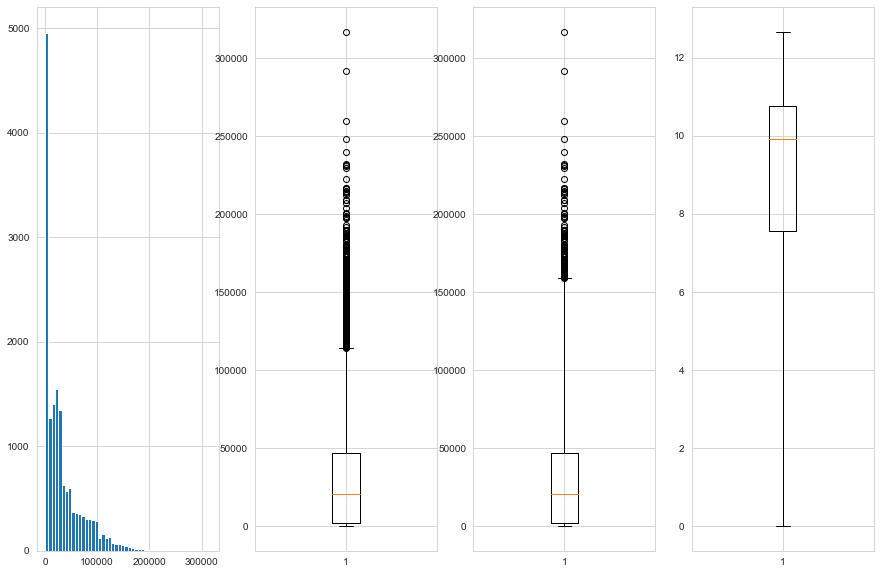

In [259]:
plt.figure(figsize=(15,10))
plt.subplot(141) # 1 satir x 4 sutun dan olusan ax in 1. sutununda calis
plt.hist(df.km, bins = 50)

plt.subplot(142)
plt.boxplot(df.km) # IQR katsayisi, defaultu 1.5

plt.subplot(143)
plt.boxplot(df.km, whis = 2.5) # IQR katsayisi, defaultu 1.5 iken 2.5 da denedik

plt.subplot(144)
plt.boxplot(np.log(df.km), whis = 2.5)
plt.show()

> km is a variable with a wide range of values. We can not consider the outlier values above as a real outliers. So let's keep it as it is.

## Paint_Type

In [260]:
df.Paint_Type.value_counts(dropna = False)

Metallic       15250
Uni/basic        637
Perl effect       32
Name: Paint_Type, dtype: int64

In [261]:
df.drop("Paint_Type", axis = 1, inplace = True)

## Body_Color

In [262]:
df.Body_Color.value_counts(dropna = False)

Black     3901
Grey      3620
White     3514
Silver    1710
Blue      1515
Red        995
Brown      298
Green      166
Beige      120
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
Name: Body_Color, dtype: int64

In [263]:
df.drop("Body_Color", axis = 1, inplace = True)

## Combumption_Comb

In [264]:
df.Combumption_Comb.sort_values()

6440    3.00
2863    3.00
2862    3.00
13493   3.00
13482   3.00
        ... 
12422   8.60
10817   8.70
12054   8.70
12529   8.70
10771   9.10
Name: Combumption_Comb, Length: 15919, dtype: float64

> Using our domain knowledge we can conclude that min value of 3 and max value of 9.10 are normal. But anyways, let's analyze outliers with plotting, np.log and winsorize methods.

In [265]:
df.Combumption_Comb.describe()

count   15919.00
mean        4.83
std         0.87
min         3.00
25%         4.10
50%         4.80
75%         5.40
max         9.10
Name: Combumption_Comb, dtype: float64

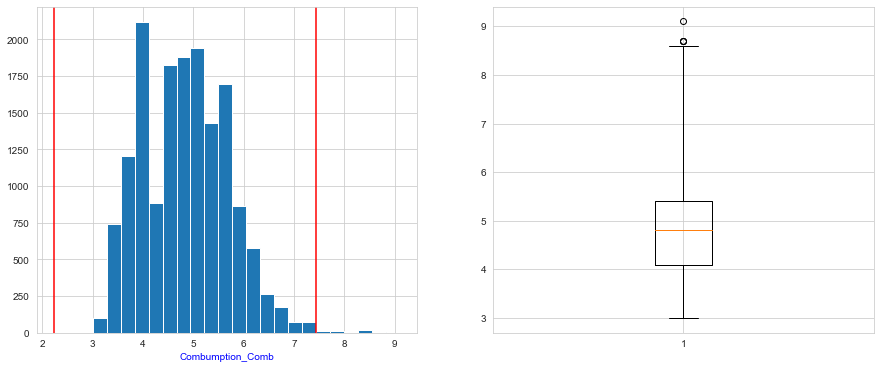

In [266]:
plt.figure(figsize = (15, 6))
plt.subplot(121)
plt.hist(df.Combumption_Comb, bins = 22)

# üç sigma aralikta(verinin %99.7 sini icine almasi beklenen bolum) iki kirmizi cizgi arasinda
plt.axvline(x=df.Combumption_Comb.mean() + 3*df.Combumption_Comb.std(),color='red')
plt.axvline(x=df.Combumption_Comb.mean() - 3*df.Combumption_Comb.std(),color='red')
plt.xlabel('Combumption_Comb',color='b')
plt.tight_layout

# Tukey’s Method: Default olarak 1.5 IQR dir. Bunu 2.5 olarak degistirdik.
plt.subplot(122)
plt.boxplot(df.Combumption_Comb, whis = 2.5)

plt.show()

> Simdi Logaritmik donusum yaparak degerlendirma yapalim

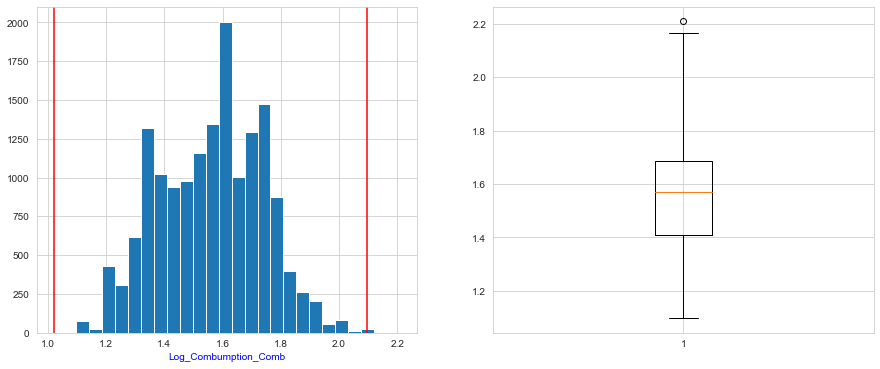

In [267]:
plt.figure(figsize = (15, 6))
plt.subplot(121)
plt.hist(np.log(df.Combumption_Comb), bins = 25)

# üç sigma aralikta(verinin %99.7 sini icine almasi beklenen bolum) iki kirmizi cizgi arasinda
plt.axvline(x=np.log(df.Combumption_Comb).mean() + 3*np.log(df.Combumption_Comb).std(),color='red')
plt.axvline(x=np.log(df.Combumption_Comb).mean() - 3*np.log(df.Combumption_Comb).std(),color='red')
plt.xlabel('Log_Combumption_Comb',color='b')
plt.tight_layout

plt.subplot(122)
plt.boxplot(np.log(df.Combumption_Comb), whis = 1.75)

plt.show()

> Winsorization yapalim. “Winsorization” u uygularken alt ve üst limitleri kendimiz belirleyebiliriz. Herhangi bir pratik yöntemi yoktur. Değerleri çok fazla kırpmak iyi değildir, fazla bilgi kaybına sebep olabilir. Genelde “Winsorization” % 5 civarında Tutulur çünkü bu oranı çok arttırırsak bazı yan etkilere neden olabilir. Ama belirli bir limit de bulunmamaktadır. Biz burada üst sınırdan %0.3 oranında keserek değerleri maksimum noktaya sınırladık.

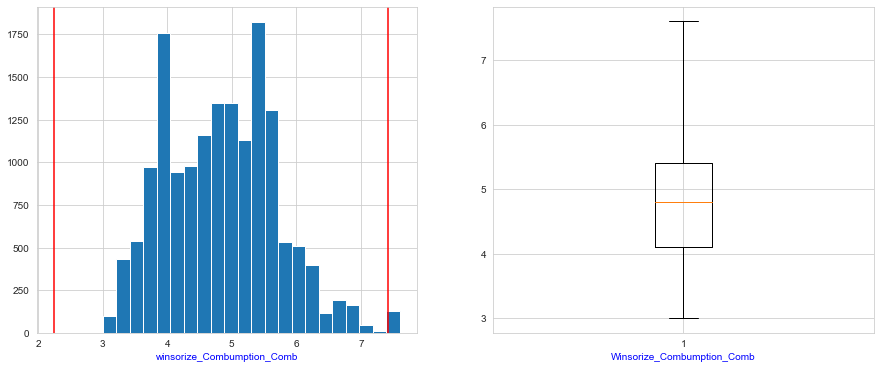

In [268]:
plt.figure(figsize = (15, 6))

winsorize_Combumption_Comb =winsorize(df.Combumption_Comb, (0,0.003)) # alt limit:0, ust limit: 0.003

plt.subplot(121)
plt.hist(winsorize_Combumption_Comb, bins = 22)
plt.axvline(x=winsorize_Combumption_Comb.mean()+3*winsorize_Combumption_Comb.std(),color='red')
plt.axvline(x=winsorize_Combumption_Comb.mean()-3*winsorize_Combumption_Comb.std(),color='red')
plt.xlabel('winsorize_Combumption_Comb',color='b')
plt.tight_layout

plt.subplot(122)
plt.boxplot(winsorize_Combumption_Comb, whis = 1.75)
plt.xlabel('Winsorize_Combumption_Comb',color='b')

plt.show()

## Displacement

In [269]:
df.Displacement.value_counts(dropna = False)

1598.00     5042
999.00      2466
1398.00     1334
1399.00      768
1229.00      677
1956.00      670
1461.00      596
1490.00      559
1422.00      467
1197.00      387
898.00       351
1395.00      321
1968.00      301
1149.00      288
1618.00      212
1798.00      210
1498.00      196
1600.00      130
1248.00      110
1997.00      103
1364.00      102
1400.00       90
1200.00       74
998.00        72
1357.00       53
1500.00       50
2000.00       46
1000.00       40
1.00          36
1998.00       25
2480.00       20
1984.00       18
899.00        11
1397.00       11
160.00         6
1499.00        5
929.00         5
139.00         4
997.00         4
1596.00        4
900.00         4
1599.00        3
1396.00        3
1199.00        3
1589.00        2
1300.00        2
2.00           2
995.00         2
1495.00        2
1608.00        2
1856.00        1
1568.00        1
1368.00        1
890.00         1
1239.00        1
1496.00        1
973.00         1
996.00         1
16000.00      

In [270]:
df.Displacement.describe()

count   15919.00
mean     1424.33
std       330.06
min         1.00
25%      1229.00
50%      1461.00
75%      1598.00
max     16000.00
Name: Displacement, dtype: float64

In [271]:
df.sort_values(by = ["Displacement"], ascending = True).Displacement.head(55)

12849     1.00
12786     1.00
12783     1.00
12781     1.00
12769     1.00
14321     1.00
12768     1.00
14314     1.00
14315     1.00
14320     1.00
12750     1.00
12670     1.00
14319     1.00
14322     1.00
12604     1.00
13904     1.00
12467     1.00
12554     1.00
12473     1.00
12484     1.00
12501     1.00
12796     1.00
12790     1.00
12499     1.00
14284     1.00
12835     1.00
14326     1.00
14327     1.00
14328     1.00
12798     1.00
12823     1.00
14324     1.00
12800     1.00
12848     1.00
12815     1.00
14325     1.00
14198     2.00
10559     2.00
13912    54.00
10194   122.00
7809    139.00
7812    139.00
7811    139.00
7810    139.00
8128    140.00
15574   160.00
15575   160.00
15576   160.00
15577   160.00
15578   160.00
15579   160.00
13653   890.00
14770   898.00
14768   898.00
14769   898.00
Name: Displacement, dtype: float64

In [272]:
df.sort_values(by = ["Displacement"], ascending = False).Displacement.head(55)

10932   16000.00
7169    15898.00
10771    2967.00
3592     2480.00
3609     2480.00
3610     2480.00
3600     2480.00
3649     2480.00
3648     2480.00
3587     2480.00
3608     2480.00
3606     2480.00
3590     2480.00
3601     2480.00
3596     2480.00
3595     2480.00
3602     2480.00
3603     2480.00
3599     2480.00
3593     2480.00
3604     2480.00
3598     2480.00
3605     2480.00
11988    2000.00
11978    2000.00
11935    2000.00
12181    2000.00
11800    2000.00
12521    2000.00
12518    2000.00
12519    2000.00
11977    2000.00
12411    2000.00
12520    2000.00
12494    2000.00
12170    2000.00
12412    2000.00
12470    2000.00
11929    2000.00
12462    2000.00
12938    2000.00
12945    2000.00
12526    2000.00
12959    2000.00
12527    2000.00
12464    2000.00
12469    2000.00
12472    2000.00
12414    2000.00
13027    2000.00
13029    2000.00
15197    2000.00
12114    2000.00
13050    2000.00
13054    2000.00
Name: Displacement, dtype: float64

In [273]:
outlier_bool_list = df.Displacement.isin([1, 2, 54, 122, 139, 140, 160, 16000, 15898])

> Domain bilgisi olarak outlier_bool_list lerin hatali giris oldugu soylenebilir

In [274]:
df.loc[outlier_bool_list, "Displacement"] = np.nan

In [275]:
fill(df, "make_model", "body_type", "Displacement", "median")

Number of NaN :  0
------------------
1598.00    5075
999.00     2466
1398.00    1335
1399.00     772
1229.00     677
1956.00     670
1461.00     596
1490.00     559
1422.00     467
1197.00     387
898.00      351
1395.00     321
1968.00     301
1149.00     288
1618.00     212
1798.00     210
1498.00     196
1600.00     130
1248.00     110
1997.00     103
1364.00     102
1400.00      90
1200.00      89
998.00       72
1357.00      53
1500.00      50
2000.00      46
1000.00      40
1998.00      25
2480.00      20
1984.00      18
899.00       11
1397.00      11
1499.00       5
929.00        5
1596.00       4
997.00        4
900.00        4
1599.00       3
1396.00       3
1199.00       3
1589.00       2
1300.00       2
995.00        2
1608.00       2
1495.00       2
1856.00       1
1686.00       1
1568.00       1
1368.00       1
890.00        1
1239.00       1
1496.00       1
973.00        1
996.00        1
1198.00       1
1238.50       1
1584.00       1
1369.00       1
1333.00       1
13

## Emmission_Class

In [276]:
df.Emission_Class.value_counts(dropna = False)

Euro 6    15770
Euro 5       99
Euro 4       50
Name: Emission_Class, dtype: int64

In [277]:
df.drop("Emission_Class", axis=1, inplace=True)

## Nr_of_Doors

In [278]:
df.Nr_of_Doors.value_counts(dropna = False)

5.00    11787
4.00     3079
3.00      832
2.00      219
7.00        1
1.00        1
Name: Nr_of_Doors, dtype: int64

In [279]:
df.Nr_of_Doors.replace([1, 7], np.nan, inplace=True)

In [280]:
df.Nr_of_Doors.value_counts(dropna = False)

5.00    11787
4.00     3079
3.00      832
2.00      219
NaN         2
Name: Nr_of_Doors, dtype: int64

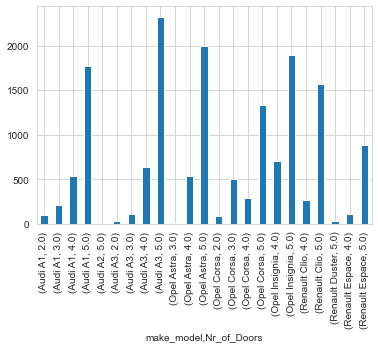

In [281]:
df.groupby(["make_model", "Nr_of_Doors"]).Nr_of_Doors.count().plot.bar();

In [282]:
fill(df, "make_model", "body_type", "Nr_of_Doors", "mode")

Number of NaN :  0
------------------
5.00    11789
4.00     3079
3.00      832
2.00      219
Name: Nr_of_Doors, dtype: int64


## Nr_of_Seats

In [283]:
df.Nr_of_Seats.value_counts(dropna = False)

5.00    14308
4.00     1127
7.00      362
2.00      119
6.00        2
3.00        1
Name: Nr_of_Seats, dtype: int64

In [284]:
df.Nr_of_Seats.replace([3, 6], np.nan, inplace=True)

In [285]:
df.Nr_of_Seats.value_counts(dropna = False)

5.00    14308
4.00     1127
7.00      362
2.00      119
NaN         3
Name: Nr_of_Seats, dtype: int64

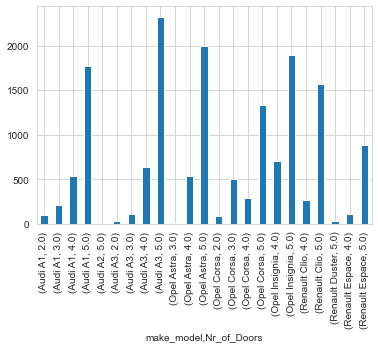

In [286]:
df.groupby(["make_model", "Nr_of_Doors"]).Nr_of_Doors.count().plot.bar();

In [287]:
fill(df, "make_model", "body_type", "Nr_of_Seats", "mode")

Number of NaN :  0
------------------
5.00    14311
4.00     1127
7.00      362
2.00      119
Name: Nr_of_Seats, dtype: int64


## CO2_Emission

In [288]:
df.CO2_Emission.value_counts(dropna=False)

120.00    836
119.00    714
102.00    694
104.00    679
106.00    623
114.00    555
99.00     545
97.00     538
139.00    523
124.00    516
103.00    445
107.00    413
108.00    362
125.00    342
129.00    333
128.00    331
133.00    330
118.00    314
110.00    289
126.00    282
85.00     275
127.00    257
117.00    254
111.00    237
113.00    235
109.00    234
140.00    221
105.00    202
135.00    202
92.00     198
130.00    189
123.00    188
150.00    174
112.00    171
143.00    171
95.00     161
116.00    157
141.00    156
98.00     151
136.00    145
137.00    133
134.00    130
145.00    126
149.00    117
153.00    113
147.00    109
101.00    105
132.00    100
115.00     87
122.00     83
121.00     82
138.00     77
93.00      66
131.00     61
142.00     58
168.00     58
90.00      54
148.00     48
144.00     40
154.00     40
94.00      37
100.00     36
146.00     36
151.00     34
186.00     31
91.00      31
152.00     28
187.00     26
82.00      25
172.00     25
96.00      22
189.00

In [289]:
df.CO2_Emission.sort_values().head(50)

8217     0.00
10566    0.00
14902    1.00
4089     1.00
6397     5.00
13008    5.00
11553    5.00
8542    12.00
6579    12.00
6578    12.00
5818    12.00
12343   13.00
8110    14.00
11888   14.00
3617    36.00
3612    36.00
3615    36.00
12547   45.00
9798    51.00
7857    80.00
13716   82.00
8475    82.00
13721   82.00
13740   82.00
13579   82.00
14151   82.00
13442   82.00
14149   82.00
13706   82.00
8911    82.00
8912    82.00
14131   82.00
8872    82.00
8874    82.00
13861   82.00
8904    82.00
14150   82.00
13518   82.00
13963   82.00
13743   82.00
13417   82.00
8585    82.00
13668   82.00
14197   82.00
8566    82.00
8580    84.00
8569    84.00
14600   85.00
13685   85.00
13710   85.00
Name: CO2_Emission, dtype: float64

In [290]:
df.drop("CO2_Emission", axis=1, inplace=True)

## Weight

In [291]:
df["Weight"].value_counts(dropna=False)

1163.00    1547
1350.00    1147
1613.00     931
1195.00     712
1180.00     694
1393.00     675
1308.00     667
1503.00     554
1335.00     411
1691.00     377
1360.00     356
1162.00     344
1090.00     306
1165.00     301
1135.00     213
1199.00     205
1734.00     177
1325.00     136
1355.00     135
1280.00     127
1260.00     127
1175.00     118
1275.00     112
1487.00     110
1278.00     110
1425.00     109
1255.00     108
1200.00     107
1273.00     104
1522.00     103
1403.00      91
1120.00      90
1659.00      89
1701.00      87
1250.00      85
1441.00      82
1285.00      80
1110.00      75
1279.00      72
1364.00      70
1345.00      67
1733.00      65
1141.00      64
1685.00      64
1071.00      64
1230.00      63
1845.00      56
1205.00      53
1052.00      53
1154.00      52
1664.00      52
1513.00      51
1065.00      50
1237.00      49
1088.00      46
1119.00      46
1440.00      46
1265.00      45
1395.00      44
1209.00      43
1585.00      43
1666.00      43
1134.00 

In [292]:
df.drop("Weight", axis=1, inplace=True)

## hp

In [293]:
df.hp.sort_values()

6034     1.00
7019     1.00
7014     1.00
9285     1.00
6005     1.00
        ...  
3605   294.00
3604   294.00
3601   294.00
3599   294.00
3592   294.00
Name: hp, Length: 15919, dtype: float64

In [294]:
df.hp.unique()

array([ 66., 141.,  85.,  70.,  92., 112.,  60.,  71.,  67., 110.,  93.,
       147.,  86., 140.,  87.,  81.,  82., 135., 132., 100.,  96., 162.,
       150., 294., 228., 270., 137.,   9., 133.,  77., 101.,  78., 103.,
         1.,  74., 118.,  84.,  88.,  80.,  76., 149.,  55.,  44.,  51.,
        52.,  63.,  40.,  65.,  75., 125., 120., 184., 239., 121., 143.,
       191.,  89., 195., 127., 122., 154., 155., 104., 123., 146.,  90.,
        56.,  53.,  54., 164.,   4., 163.,  57., 119., 165., 117., 115.,
        98., 168., 167.])

In [295]:
df.hp.loc[df.hp < 40] = np.nan

In [296]:
perc_nans(df.hp)

0.138199635655506

In [297]:
fill(df, "make_model", "body_type", "hp", "median")

Number of NaN :  0
------------------
85.00     2544
66.00     2124
81.00     1408
100.00    1311
110.00    1112
70.00      890
125.00     707
51.00      695
55.00      577
118.00     552
92.00      466
121.00     400
147.00     380
77.00      353
56.00      315
54.00      276
103.00     259
87.00      232
165.00     194
88.00      177
60.00      160
162.00      98
74.00       81
96.00       72
71.00       59
101.00      47
67.00       40
154.00      39
122.00      35
119.00      30
164.00      27
135.00      24
82.00       22
52.00       22
78.00       20
146.00      18
294.00      18
141.00      16
57.00       10
120.00       8
104.00       8
191.00       7
112.00       7
155.00       6
117.00       6
184.00       5
90.00        4
65.00        4
76.00        4
98.00        3
80.00        3
93.00        3
149.00       3
168.00       3
40.00        2
86.00        2
53.00        2
228.00       2
167.00       2
143.00       2
150.00       2
63.00        2
140.00       2
89.00        2
12

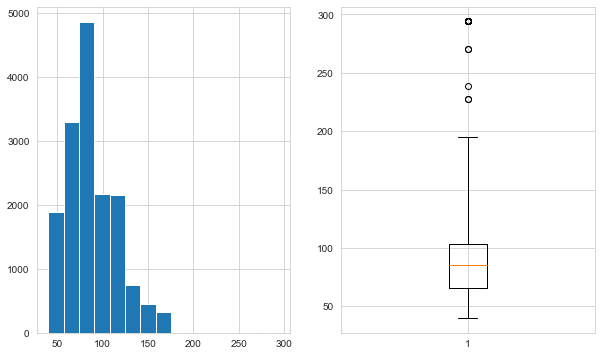

In [298]:
plt.figure(figsize=(10,6))

plt.subplot(121)
plt.hist(df.hp, bins=15)

plt.subplot(122)
plt.boxplot(df.hp, whis=2.5)

plt.show()

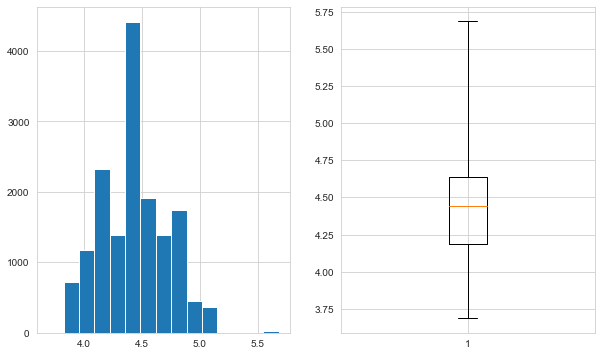

In [299]:
plt.figure(figsize=(10,6))

plt.subplot(121)
plt.hist(np.log(df.hp), bins=15)

plt.subplot(122)
plt.boxplot(np.log(df.hp), whis=2.5)

plt.show()

> Logaritmik donusumle outliers dan kurtulunabilir. ancak domain bilsisi olarak mevcut degerlerde anomali yok. bu sekilde kalmali.

## price

In [300]:
df.price.describe()

count   15919.00
mean    18019.90
std      7386.17
min        13.00
25%     12850.00
50%     16900.00
75%     21900.00
max     74600.00
Name: price, dtype: float64

In [301]:
df.price.sort_values()

8594        13
8828       120
6066       255
8829       331
8827      4950
         ...  
15828    64332
3587     64900
3649     67600
15826    68320
3648     74600
Name: price, Length: 15919, dtype: int64

In [302]:
df.drop(index = df[df.price<=331].index, axis = 0, inplace = True)

In [303]:
df.shape

(15915, 117)

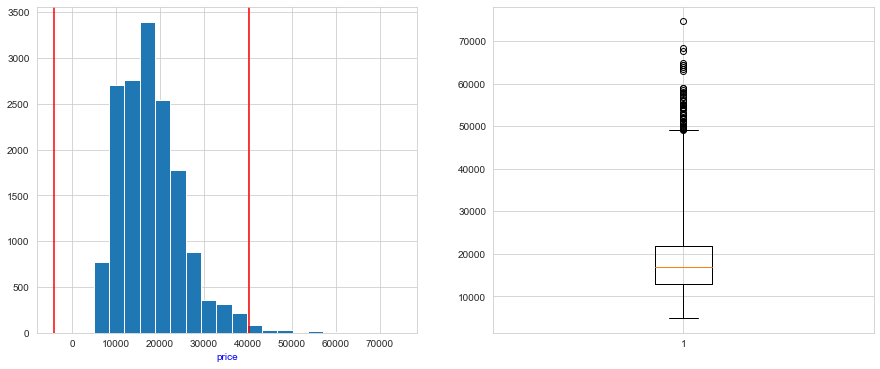

In [304]:
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.hist(df.price, bins=20)

# üç sigma aralikta(verinin %99.7 sini icine almasi beklenen bolum) iki kirmizi cizgi arasinda
plt.axvline(x=df.price.mean() + 3*df.price.std(),color='red')
plt.axvline(x=df.price.mean() - 3*df.price.std(),color='red')
plt.xlabel('price',color='b')
plt.tight_layout


plt.subplot(122)
plt.boxplot(df.price, whis=3)

plt.show()

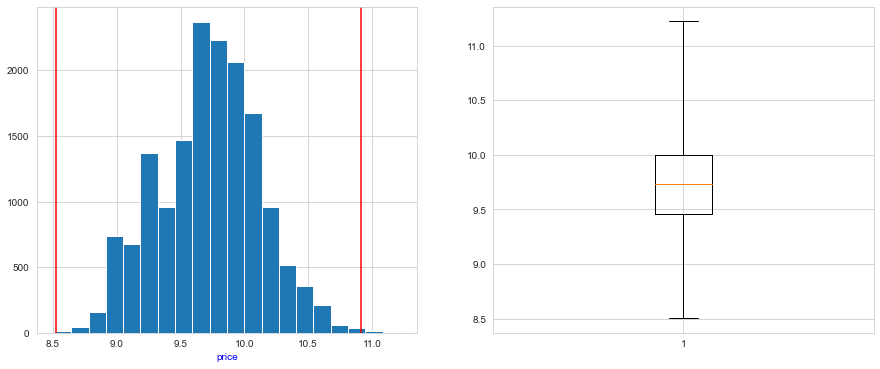

In [305]:
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.hist(np.log(df.price), bins=20)

# üç sigma aralikta(verinin %99.7 sini icine almasi beklenen bolum) iki kirmizi cizgi arasinda
plt.axvline(x=np.log(df.price).mean() + 3*np.log(df.price).std(),color='red')
plt.axvline(x=np.log(df.price).mean() - 3*np.log(df.price).std(),color='red')
plt.xlabel('price',color='b')
plt.tight_layout


plt.subplot(122)
plt.boxplot(np.log(df.price), whis=2.3)

plt.show()

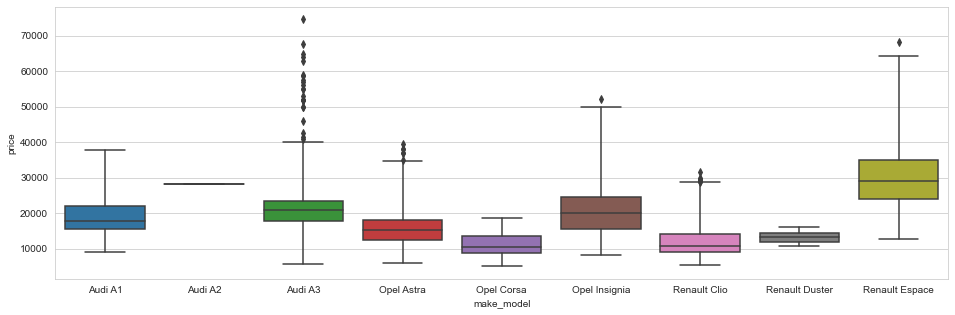

In [306]:
plt.figure(figsize=(16,5))
sns.boxplot(x="make_model", y="price", data=df, whis=3)
plt.show()

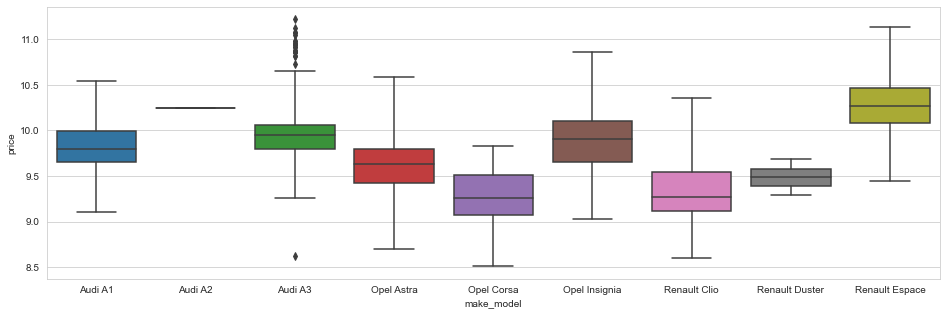

In [307]:
plt.figure(figsize=(16,5))
sns.boxplot(x="make_model", y=np.log(df.price), data=df, whis=2.3)
plt.show()

> Yuksek degerli Outlierslar Audi A3 markada var. Domain bilgisi olarak bu beklenen bir durum.

## url

In [308]:
df.drop('url', axis=1, inplace=True)

## Make

In [309]:
df.drop('Make', axis=1, inplace=True)

## Model

In [310]:
df.drop('Model', axis=1, inplace=True)

## Final_Step

In [311]:
df.head(2)

,make_model,body_type,price,vat,km,hp,Type,Previous_Owners,Inspection_New,Nr_of_Doors,Nr_of_Seats,Gearing_Type,Displacement,Drive_Chain,Fuel,Gears,Age,Upholstery_Type,Upholstery_Color,Combumption_Comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,...,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights
0,Audi A1,Sedans,15770,VAT deductible,56013.00,66.00,Used,2.00,1,5.00,5.00,Automatic,1422.00,front,Diesel,5.00,3.00,Cloth,Black,3.80,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,...,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1
1,Audi A1,Sedans,14500,Price negotiable,80000.00,141.00,Used,1.00,0,3.00,4.00,Automatic,1798.00,front,Benzine,7.00,2.00,Cloth,Grey,5.60,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,...,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1


In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15915 entries, 0 to 15918
Data columns (total 114 columns):
 #    Column                                    Dtype  
---   ------                                    -----  
 0    make_model                                object 
 1    body_type                                 object 
 2    price                                     int64  
 3    vat                                       object 
 4    km                                        float64
 5    hp                                        float64
 6    Type                                      object 
 7    Previous_Owners                           float64
 8    Inspection_New                            int64  
 9    Nr_of_Doors                               float64
 10   Nr_of_Seats                               float64
 11   Gearing_Type                              object 
 12   Displacement                              float64
 13   Drive_Chain                               ob

In [313]:
numeric_columns = "price,km,Gears,Previous_Owners,Combumption_Comb,Displacement,Age,hp,Nr_of_Doors,Nr_of_Seats".split(",")

In [314]:
df[numeric_columns].head(2)

,price,km,Gears,Previous_Owners,Combumption_Comb,Displacement,Age,hp,Nr_of_Doors,Nr_of_Seats
0,15770,56013.00,5.00,2.00,3.80,1422.00,3.00,66.00,5.00,5.00
1,14500,80000.00,7.00,1.00,5.60,1798.00,2.00,141.00,3.00,4.00


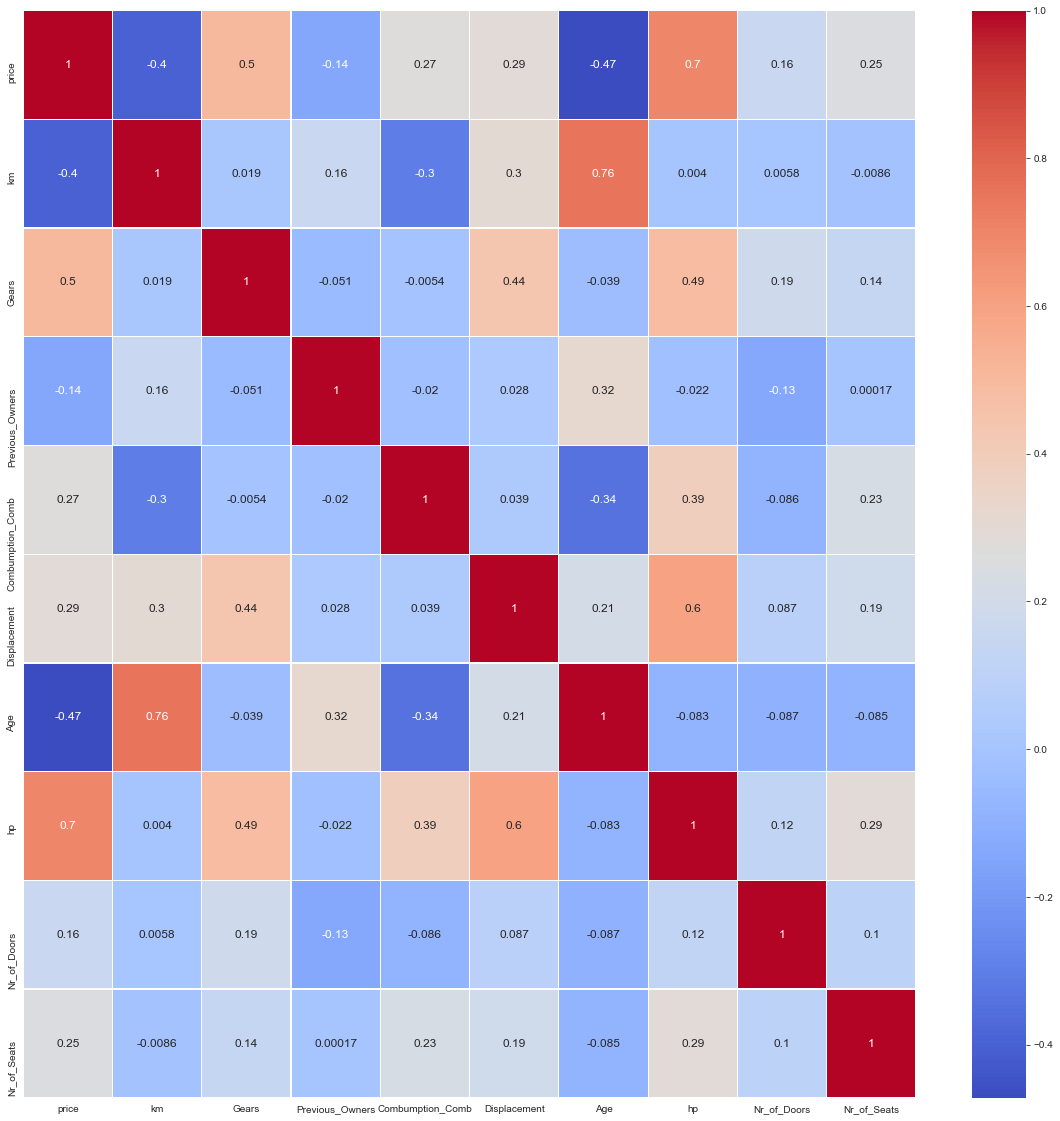

In [315]:
plt.figure(figsize = (20,20))
sns.heatmap(df[numeric_columns].corr(), annot = True, cmap="coolwarm", linewidths=0.2, annot_kws = {"size": 12});

In [316]:
# sns.pairplot(df[numeric_columns], size = 2.5)
# plt.show()

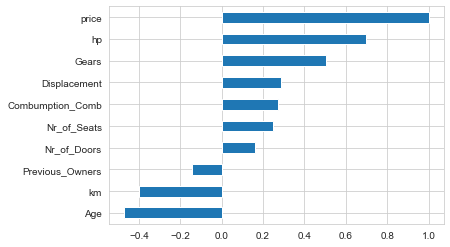

In [317]:
df[numeric_columns].corr()['price'].sort_values().plot.barh();

In [318]:
df.to_csv("final_scout_not_dummy_20201204.csv", index=False)

In [319]:
df_final = pd.get_dummies(df)

In [320]:
df_final.shape

(15915, 145)

In [321]:
df_final.head()

,price,km,hp,Previous_Owners,Inspection_New,Nr_of_Doors,Nr_of_Seats,Displacement,Gears,Age,Combumption_Comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,...,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A1,make_model_Audi A2,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_Price negotiable,vat_VAT deductible,Type_Demonstration,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_Chain_4WD,Drive_Chain_front,Drive_Chain_rear,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Upholstery_Type_Cloth,Upholstery_Type_Part/Full Leather,Upholstery_Color_Black,Upholstery_Color_Brown,Upholstery_Color_Grey,Upholstery_Color_Other
0,15770,56013.00,66.00,2.00,1,5.00,5.00,1422.00,5.00,3.00,3.80,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,...,0,0,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0
1,14500,80000.00,141.00,1.00,0,3.00,4.00,1798.00,7.00,2.00,5.60,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,...,0,0,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0
2,14640,83450.00,85.00,1.00,0,4.00,4.00,1598.00,5.00,3.00,3.80,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,...,0,0,1,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0
3,14500,73000.00,66.00,1.00,0,3.00,4.00,1422.00,6.00,3.00,3.80,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,...,0,0,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0
4,16790,16200.00,66.00,1.00,1,5.00,5.00,1422.00,5.00,3.00,4.10,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,...,0,0,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0


In [322]:
df_final=df_final.rename(columns={"Type_Employee's car": "Type_Employees car"})

In [323]:
df_final.to_csv("final_scout_20201204.csv", index=False)